In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [110]:
class genetic_algorithm():
    def __init__(self, num_individuals, num_genes, cost_matrix):
        self.num_individuals = num_individuals
        self.num_genes = num_genes
        self.cost_matrix = cost_matrix
    
    # count the fitness score of each individual
    def fitness_score(self, individual):
        score = 0
        for index in range(1, len(individual) + 1):
            score += self.cost_matrix[individual[index - 1] - 1][index - 1]
        return 1/score
    
    # select parents in population, using Roulette process
    def select(self, population, threshold):
        sum_score, prob = 0, [] 
        for individual in population:
            sum_score += self.fitness_score(individual)
        for individual in population:
            prob_survive = self.fitness_score(individual)/sum_score
            prob.append(prob_survive)
        parents = []
        while len(parents) < threshold:
            random_number = np.random.random()
            partial_sum = 0
            for index, individual in enumerate(population):
                partial_sum += prob[index]
                if partial_sum > random_number:
                    parents.append(individual)
                    break
        return parents
    
    # crossover of the two individuals, using order crossover
    def crossover(self, fir_indi, sec_indi, crossover_range):
        fir_point = np.random.randint(0, self.num_genes//2)
        sec_point = fir_point + crossover_range
        
        def crossover_indi(fir_indi, sec_indi, fir_point, sec_point):
            sec_range = sec_indi[fir_point: sec_point]
            temp = np.concatenate((fir_indi[sec_point:], fir_indi[:sec_point]), axis = 0)
            indexes = []
            for index in range(self.num_genes):
                if temp[index] in sec_range:
                    indexes.append(index)
            temp = np.delete(temp, indexes)
            point = self.num_genes - sec_point
            sec_crossover = np.concatenate((temp[point:], sec_range, temp[:point]), axis = 0)    
            return sec_crossover
        
        sec_offspring = crossover_indi(fir_indi, sec_indi, fir_point, sec_point)
        fir_offspring = crossover_indi(sec_indi, fir_indi, fir_point, sec_point)
        return fir_offspring, sec_offspring
    
    # mutate individual, using inversion mutation
    def mutate(self, individual, mutation_range):
        fir_point = np.random.randint(0, self.num_genes//2)
        sec_point = fir_point + mutation_range
        
        tmp, start = [], sec_point - 1
        while start >= fir_point:
            tmp.append(individual[start])
            start -= 1
            
        indi_after_mutate = np.concatenate((individual[:fir_point], tmp, individual[sec_point:]), axis = 0)
        return indi_after_mutate
    
    # installation
    def genetic_algo(self, max_generations, crossover_rate, mutation_rate):
        np.random.seed(42)
        
        # init population, number of generations
        population, count_generations = [], 0
        tmp = np.arange(1, self.num_genes + 1, 1)
        for index in range(self.num_individuals):
            random_cities = np.random.permutation(tmp)
            population.append(random_cities)
        count_generations += 1
        
        # installation
        fitness_history = []
        while count_generations < max_generations:
            new_generation, parents = population.copy(), []
            parents = self.select(population, threshold = 50)
            pop_size = 0
            while pop_size < self.num_individuals:
                random_num = np.random.random()
                if random_num < crossover_rate:
                    fir_index = np.random.randint(0, len(parents) - 1)
                    sec_index = np.random.randint(fir_index, len(parents))

                    fir_offspring, sec_offspring = self.crossover(parents[fir_index], parents[sec_index], 10)
                    new_generation.append(fir_offspring), new_generation.append(sec_offspring)
                    pop_size += 1
                    
                if random_num < mutation_rate:
                    index = np.random.randint(0, len(parents))
                    offspring = self.mutate(parents[index], 5)
                    new_generation.append(offspring)
                    pop_size += 1
                    
            new_generation.sort(key = lambda x: self.fitness_score(x), reverse = True)
            new_generation = new_generation[:self.num_individuals]
            best_fitness, best_individual = -1, None
            for individual in new_generation:
                if self.fitness_score(individual) > best_fitness:
                    best_fitness = self.fitness_score(individual)
                    best_individual = individual
                    
            fitness_history.append(best_fitness)
            print("The best fitness score is {} of gen {}".format(1/best_fitness, count_generations))
            population = new_generation
            count_generations += 1
        return fitness_history

In [111]:
cost_matrix = np.random.randint(20, 100, [50, 50])

model = genetic_algorithm(num_individuals = 100, num_genes = 50, cost_matrix = cost_matrix)
fitness_history = model.genetic_algo(max_generations = 100, crossover_rate = 0.7, mutation_rate = 0.2)

The best fitness score is 2504.0 of gen 1
The best fitness score is 2385.0 of gen 2
The best fitness score is 2385.0 of gen 3
The best fitness score is 2385.0 of gen 4
The best fitness score is 2385.0 of gen 5
The best fitness score is 2293.0 of gen 6
The best fitness score is 2293.0 of gen 7
The best fitness score is 2293.0 of gen 8
The best fitness score is 2293.0 of gen 9
The best fitness score is 2293.0 of gen 10
The best fitness score is 2293.0 of gen 11
The best fitness score is 2293.0 of gen 12
The best fitness score is 2293.0 of gen 13
The best fitness score is 2268.0 of gen 14
The best fitness score is 2268.0 of gen 15
The best fitness score is 2268.0 of gen 16
The best fitness score is 2268.0 of gen 17
The best fitness score is 2244.0 of gen 18
The best fitness score is 2244.0 of gen 19
The best fitness score is 2201.0 of gen 20
The best fitness score is 2182.0 of gen 21
The best fitness score is 2182.0 of gen 22
The best fitness score is 2182.0 of gen 23
The best fitness sco

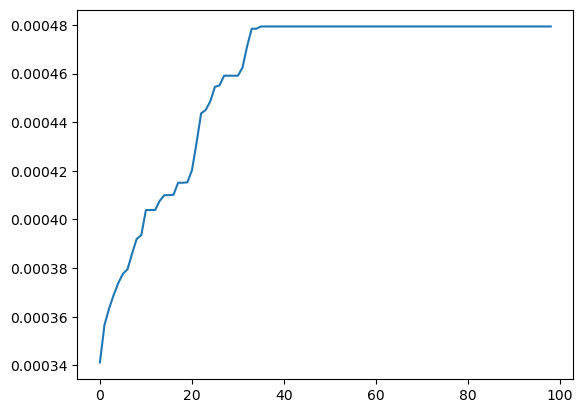

In [107]:
plt.plot(fitness_history)

In [96]:
print(cost_matrix)

[[67 61 49 70 54 81 70 69 49 38 69 73 23 31 34 34 29 80 38 72 91 76 28 48
  26]
 [91 36 98 35 90 57 95 66 29 43 69 87 62 56 64 73 62 87 56 60 20 35 56 56
  26]
 [59 70 83 41 62 81 73 46 48 35 30 40 28 46 98 42 70 99 22 35 27 61 92 54
  90]
 [91 67 73 55 25 90 31 78 84 69 62 62 68 95 74 69 40 32 61 34 69 20 70 53
  61]
 [81 51 80 73 93 77 43 46 40 37 74 87 66 73 37 92 83 68 54 58 77 76 25 97
  97]
 [39 69 28 95 33 42 67 99 75 59 88 58 93 62 50 89 22 23 46 46 66 79 55 65
  80]
 [61 26 49 69 66 59 24 89 77 63 90 51 98 96 93 59 76 30 59 66 21 71 91 68
  78]
 [57 35 97 46 93 47 85 64 52 79 69 65 54 60 77 96 74 24 24 41 53 84 78 36
  70]
 [68 28 93 34 48 72 44 47 42 22 52 90 88 36 86 86 53 27 64 79 75 89 41 52
  69]
 [90 65 71 93 85 40 43 67 32 83 24 37 94 56 73 51 47 64 47 84 89 94 61 52
  35]
 [32 40 78 66 58 62 46 56 22 95 26 77 39 98 84 93 33 98 68 93 56 25 25 47
  97]
 [32 32 29 99 58 98 42 56 27 79 24 46 38 62 62 54 74 80 66 96 75 37 84 72
  30]
 [20 27 38 74 35 85 31 93 81 77 40 56 24